In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn import tree

In [3]:
bo = pd.read_csv('BackOrders.csv')
bo.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [4]:
bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
sku                  61589 non-null int64
national_inv         61589 non-null int64
lead_time            58186 non-null float64
in_transit_qty       61589 non-null int64
forecast_3_month     61589 non-null int64
forecast_6_month     61589 non-null int64
forecast_9_month     61589 non-null int64
sales_1_month        61589 non-null int64
sales_3_month        61589 non-null int64
sales_6_month        61589 non-null int64
sales_9_month        61589 non-null int64
min_bank             61589 non-null int64
potential_issue      61589 non-null object
pieces_past_due      61589 non-null int64
perf_6_month_avg     61589 non-null float64
perf_12_month_avg    61589 non-null float64
local_bo_qty         61589 non-null int64
deck_risk            61589 non-null object
oe_constraint        61589 non-null object
ppap_risk            61589 non-null object
stop_auto_buy        61589 non-null objec

In [5]:
bo.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


In [6]:
# to supress scientific notations
pd.options.display.float_format = '{:.2f}'.format

In [7]:
bo.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,61589.00,61589.00,58186.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00
mean,2037187.68,287.72,7.56,30.19,169.27,315.04,453.58,44.74,150.73,283.55,419.64,43.09,1.61,-6.26,-5.86,1.21
std,656417.82,4233.91,6.50,792.87,5286.74,9774.36,14202.01,1373.81,5224.96,8872.27,12698.58,959.61,42.31,25.54,24.84,29.98
min,1068628.00,-2999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,1498574.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.64,0.00
50%,1898033.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,6.00,0.00,0.00,0.82,0.80,0.00
75%,2314826.00,57.00,8.00,0.00,12.00,25.00,36.00,6.00,17.00,34.00,51.00,3.00,0.00,0.96,0.95,0.00
max,3284895.00,673445.00,52.00,170976.00,1126656.00,2094336.00,3062016.00,295197.00,934593.00,1799099.00,2631590.00,192978.00,7392.00,1.00,1.00,2999.00


In [8]:
bo.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [9]:
for col in ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']:
    bo[col] = bo[col].astype('category')

In [10]:
bo.dtypes

sku                     int64
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

In [11]:
# 'sku' column is just indexes so we can drop it
bo.drop('sku',axis=1,inplace=True)

In [12]:
bo.shape

(61589, 22)

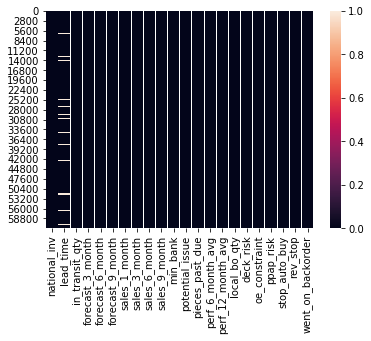

In [13]:
sns.heatmap(bo.isnull())
plt.show()

In [14]:
# since number of missing values is low and only in one column we can drop the rwos wiht null values
bo = bo.dropna(axis=0)

In [15]:
bo.shape

(58186, 22)

In [16]:
num_attr = bo.select_dtypes(include=['int64','float64']).columns
num_attr

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

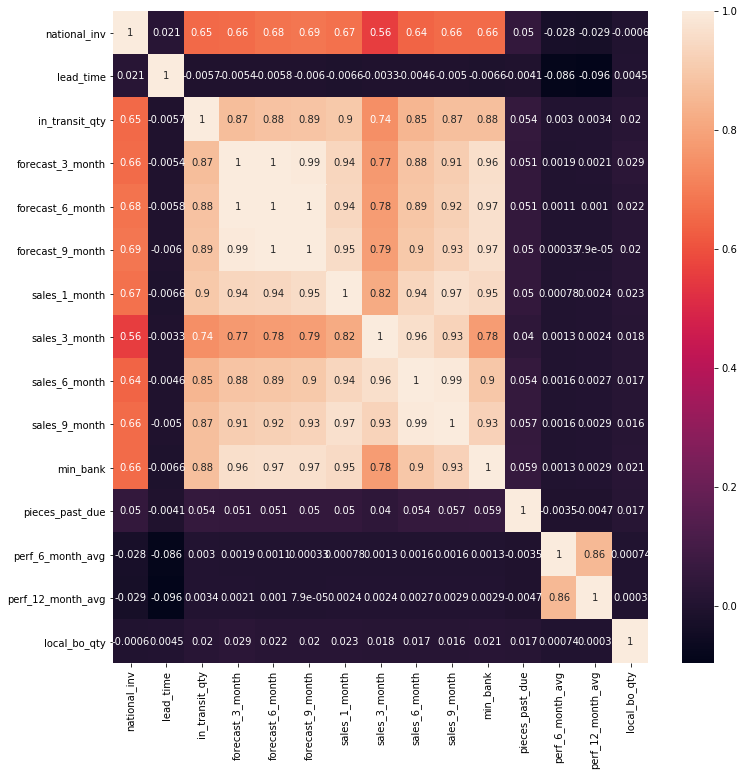

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(bo[num_attr].corr(),annot=True)
plt.show()

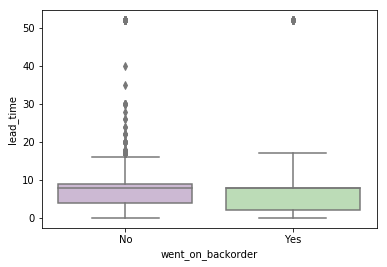

In [18]:
sns.boxplot(x='went_on_backorder',y='lead_time',data=bo,palette='PRGn')
plt.show()

In [19]:
cat_attr = bo.select_dtypes(include=['category']).columns
bo = pd.get_dummies(bo, columns=cat_attr, drop_first=True)
bo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58186 entries, 1 to 61588
Data columns (total 22 columns):
national_inv             58186 non-null int64
lead_time                58186 non-null float64
in_transit_qty           58186 non-null int64
forecast_3_month         58186 non-null int64
forecast_6_month         58186 non-null int64
forecast_9_month         58186 non-null int64
sales_1_month            58186 non-null int64
sales_3_month            58186 non-null int64
sales_6_month            58186 non-null int64
sales_9_month            58186 non-null int64
min_bank                 58186 non-null int64
pieces_past_due          58186 non-null int64
perf_6_month_avg         58186 non-null float64
perf_12_month_avg        58186 non-null float64
local_bo_qty             58186 non-null int64
potential_issue_Yes      58186 non-null uint8
deck_risk_Yes            58186 non-null uint8
oe_constraint_Yes        58186 non-null uint8
ppap_risk_Yes            58186 non-null uint8
stop_auto_b

In [20]:
bo['went_on_backorder_Yes'].value_counts()

0    47217
1    10969
Name: went_on_backorder_Yes, dtype: int64

In [21]:
x,y = bo.loc[:,bo.columns!='went_on_backorder_Yes'].values, bo.loc[:,'went_on_backorder_Yes'].values

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=123)

In [22]:
xtrain.shape

(40730, 21)

In [23]:
xtest.shape

(17456, 21)

In [24]:
pd.value_counts(ytrain,normalize=True)

0   0.81
1   0.19
dtype: float64

In [25]:
pd.value_counts(ytest,normalize=True)

0   0.81
1   0.19
dtype: float64

In [81]:
clf = tree.DecisionTreeClassifier(max_depth=3).fit(xtrain,ytrain)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
train_pred = clf.predict(xtrain)
train_pred[:5]

array([0, 0, 1, 0, 0], dtype=uint8)

In [83]:
test_pred = clf.predict(xtest)
test_pred[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [84]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('plot1')
graphviz.Source(dot_data).view()

'Source.gv.pdf'

In [85]:
confusion_matrix_train = confusion_matrix(ytrain,train_pred)
confusion_matrix_train

array([[31531,  1536],
       [ 3976,  3687]], dtype=int64)

In [86]:
confusion_matrix_test = confusion_matrix(ytest,test_pred)
confusion_matrix_test

array([[13509,   641],
       [ 1709,  1597]], dtype=int64)

In [87]:
accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/confusion_matrix_train.sum()
tnr_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
tpr_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print('Train Accuracy =', accuracy_train)
print('Train TNR =', tnr_train)
print('Train TPR =', tpr_train)

Train Accuracy = 0.8646697765774614
Train TNR = 0.9535488553542807
Train TPR = 0.4811431554221584


In [88]:
accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/confusion_matrix_test.sum()
tnr_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
tpr_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print('Test Accuracy =', accuracy_test)
print('Test TNR =', tnr_test)
print('Test TPR =', tpr_test)

Test Accuracy = 0.8653758020164987
Test TNR = 0.9546996466431096
Test TPR = 0.48306110102843314


In [89]:
test_pred_prob = clf.predict_proba(xtest)
test_pred_prob = test_pred_prob[:,1]
test_pred_prob

array([0.10857558, 0.10857558, 0.0242235 , ..., 0.0242235 , 0.10857558,
       0.0242235 ])

In [90]:
fpr,tpr,thresh = roc_curve(ytest,test_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC Area under curve =', roc_auc)

ROC Area under curve = 0.8755393128245251


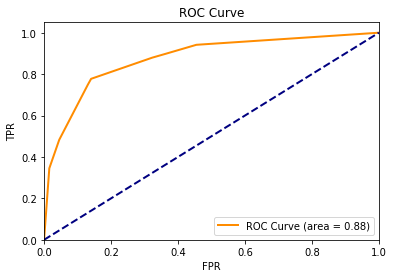

In [91]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [92]:
param_grid = {'criterion': ['gini','entropy'],
             'min_samples_split': [2,10,20],
             'max_depth': [None,2,5,10],
             'min_samples_leaf': [1,5,10],
             'max_leaf_nodes': [None,5,10,20]}

In [93]:
from sklearn.model_selection import GridSearchCV
dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=2)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [95]:
clf_best = grid_search.best_estimator_
dot_data = tree.export_graphviz(clf_best, out_file=None)
graphviz.Source(dot_data).view()

'Source.gv.pdf'

In [96]:
importances = clf_best.feature_importances_
importances = DataFrame([bo.columns, importances]).transpose()
importances.columns = [['Variables','Importance']]
importances

,Variables,Importance
0,national_inv,0.46
1,lead_time,0.02
2,in_transit_qty,0.04
3,forecast_3_month,0.10
4,forecast_6_month,0.01
5,forecast_9_month,0.13
6,sales_1_month,0.08
7,sales_3_month,0.02
8,sales_6_month,0.04
9,sales_9_month,0.02


In [130]:
train_pred = clf_best.predict(xtrain)
test_pred = clf_best.predict(xtest)

confusion_matrix_train = confusion_matrix(ytrain,train_pred)
confusion_matrix_test = confusion_matrix(ytest,test_pred)

accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/confusion_matrix_train.sum()
tnr_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
tpr_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print('Train Accuracy =', accuracy_train)
print('Train TNR =', tnr_train)
print('Train TPR =', tpr_train)

accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/confusion_matrix_test.sum()
tnr_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
tpr_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print('\nTest Accuracy =', accuracy_test)
print('Test TNR =', tnr_test)
print('Test TPR =', tpr_test)

Train Accuracy = 0.9218757672477289
Train TNR = 0.9569661596153265
Train TPR = 0.7704554352081431

Test Accuracy = 0.9006645279560037
Test TNR = 0.9443109540636042
Test TPR = 0.7138535995160314


In [131]:
test_pred_prob = clf_best.predict_proba(xtest)
test_pred_prob = test_pred_prob[:,1]

fpr,tpr,thresh = roc_curve(ytest,test_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC Area under curve =', roc_auc)

ROC Area under curve = 0.9248765602320654


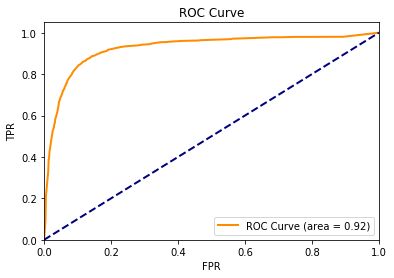

In [132]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
param_grid = {'n_neighbors': [3,5,7,9,11,13],
             'metric': ['euclidean','manhattan','minkowski']}

In [125]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=2)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean', 'manhattan', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9}

In [128]:
knn_best = grid_search.best_estimator_

In [133]:
train_pred = knn_best.predict(xtrain)
test_pred = knn_best.predict(xtest)

confusion_matrix_train = confusion_matrix(ytrain,train_pred)
confusion_matrix_test = confusion_matrix(ytest,test_pred)

accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/confusion_matrix_train.sum()
tnr_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
tpr_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print('Train Accuracy =', accuracy_train)
print('Train TNR =', tnr_train)
print('Train TPR =', tpr_train)

accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/confusion_matrix_test.sum()
tnr_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
tpr_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print('\nTest Accuracy =', accuracy_test)
print('Test TNR =', tnr_test)
print('Test TPR =', tpr_test)

Train Accuracy = 0.9186840166953106
Train TNR = 0.9487404360843137
Train TPR = 0.7889860368002088

Test Accuracy = 0.8964825847846013
Test TNR = 0.9350530035335689
Test TPR = 0.7313974591651543


In [135]:
test_pred_prob = knn_best.predict_proba(xtest)
test_pred_prob = test_pred_prob[:,1]

fpr,tpr,thresh = roc_curve(ytest,test_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC Area under curve =', roc_auc)

ROC Area under curve = 0.9419939867336184


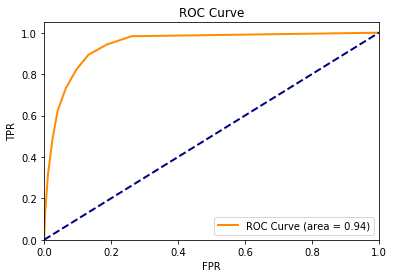

In [136]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [147]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [10,15,20],
              'max_features': [5,10,15,20]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=2)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 15, 20], 'max_features': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 15}

In [149]:
rf_best = grid_search.best_estimator_

train_pred = rf_best.predict(xtrain)
test_pred = rf_best.predict(xtest)

confusion_matrix_train = confusion_matrix(ytrain,train_pred)
confusion_matrix_test = confusion_matrix(ytest,test_pred)

accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/confusion_matrix_train.sum()
tnr_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
tpr_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print('Train Accuracy =', accuracy_train)
print('Train TNR =', tnr_train)
print('Train TPR =', tpr_train)

accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/confusion_matrix_test.sum()
tnr_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
tpr_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print('\nTest Accuracy =', accuracy_test)
print('Test TNR =', tnr_test)
print('Test TPR =', tpr_test)

Train Accuracy = 0.9959489319911613
Train TNR = 0.9980040523785042
Train TPR = 0.9870807777632781

Test Accuracy = 0.9282768102658112
Test TNR = 0.9551236749116607
Test TPR = 0.8133696309739867


In [150]:
test_pred_prob = rf_best.predict_proba(xtest)
test_pred_prob = test_pred_prob[:,1]

fpr,tpr,thresh = roc_curve(ytest,test_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC Area under curve =', roc_auc)

ROC Area under curve = 0.9663521298677423


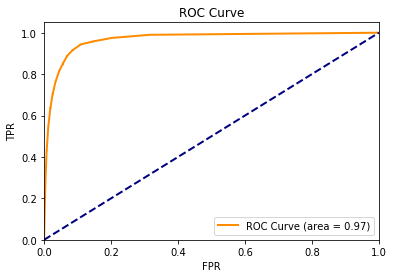

In [151]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [152]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [153]:
train_pred = nb_model.predict(xtrain)
test_pred = nb_model.predict(xtest)

confusion_matrix_train = confusion_matrix(ytrain,train_pred)
confusion_matrix_test = confusion_matrix(ytest,test_pred)

accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/confusion_matrix_train.sum()
tnr_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
tpr_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print('Train Accuracy =', accuracy_train)
print('Train TNR =', tnr_train)
print('Train TPR =', tpr_train)

accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/confusion_matrix_test.sum()
tnr_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
tpr_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print('\nTest Accuracy =', accuracy_test)
print('Test TNR =', tnr_test)
print('Test TPR =', tpr_test)

Train Accuracy = 0.24028971274245028
Train TNR = 0.0692230925091481
Train TPR = 0.9784679629387968

Test Accuracy = 0.23934463794683777
Test TNR = 0.06600706713780918
Test TPR = 0.9812462189957653


In [154]:
test_pred_prob = nb_model.predict_proba(xtest)
test_pred_prob = test_pred_prob[:,1]

fpr,tpr,thresh = roc_curve(ytest,test_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC Area under curve =', roc_auc)

ROC Area under curve = 0.6142531193952958


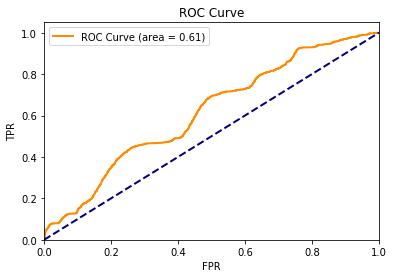

In [155]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()